In [11]:
%run load_dataset.ipynb
%run load_labels.ipynb

In [12]:
import scipy
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
n_channels = 32
sfreq = 128
ch_types = 'eeg'

In [14]:
coordinates_filename = '/Users/christiansletten/Dropbox/2022-2023/Fordypningsprosjekt/Publicly Available Dataset/eeg_stress_detection/Data/Coordinates.locs'

In [15]:
ch_names = []
with open(coordinates_filename, "r") as file:
    for line in file:
        elements = line.split()
        channel = elements[-1]
        ch_names.append(channel)

In [16]:
data = load_dataset(raw=True)
labels = load_labels()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/christiansletten/Dropbox/2022-2023/Fordypningsprosjekt/Publicly Available Dataset/eeg_stress_detection/Data/raw_data'

# Filtering one sample

In [8]:
sample = data[1]
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types=ch_types)
raw = mne.io.RawArray(sample, info, first_samp=0, copy='auto', verbose=False)

NameError: name 'data' is not defined

In [9]:
raw_bandpass = raw.copy().filter(1, 50, verbose=False)

NameError: name 'raw' is not defined

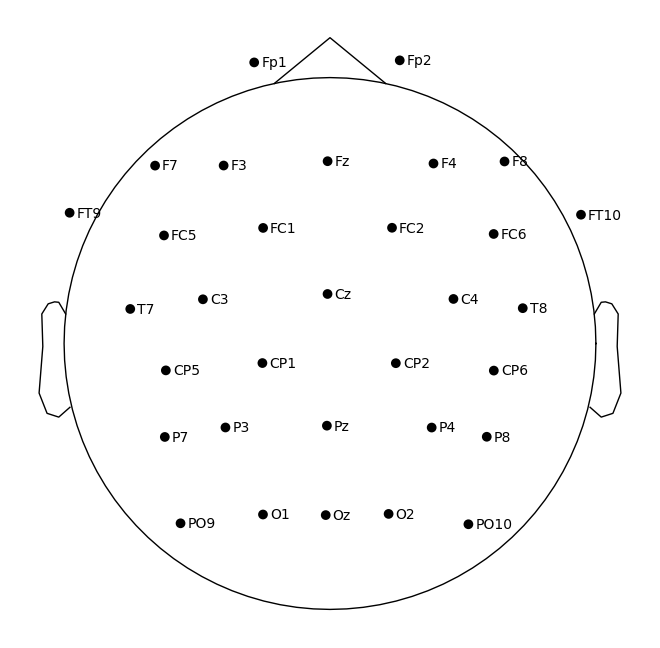

In [65]:
montage = mne.channels.make_standard_montage('standard_1020')
raw_bandpass.set_montage(montage)
fig = raw_bandpass.plot_sensors(kind='topomap',ch_type='eeg',show_names=True)
plt.close(fig)

In [ ]:
ica = mne.preprocessing.ICA(n_components=18)
ica.fit(raw)
ica.plot_sources(raw)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 18 components
Fitting ICA took 4.4s.
Creating RawArray with float64 data, n_channels=18, n_times=3200
    Range : 0 ... 3199 =      0.000 ...    24.992 secs
Ready.
Using pyopengl with version 3.1.6


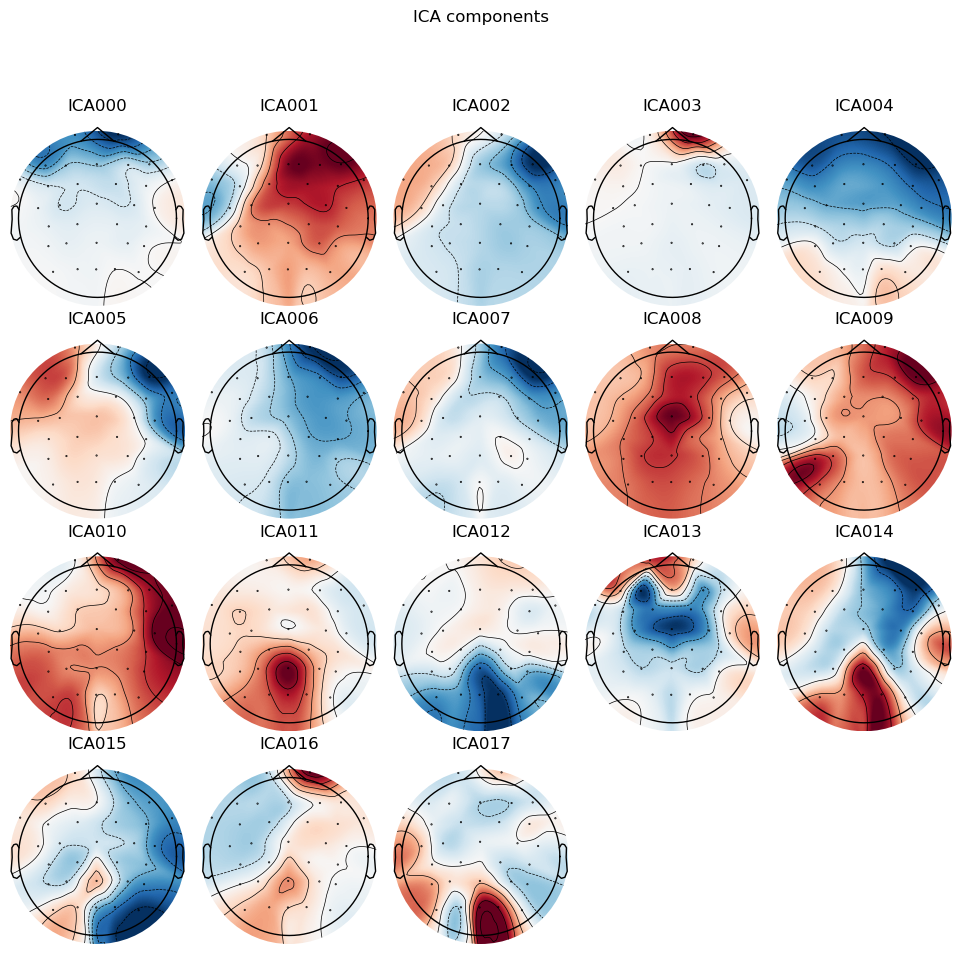

[<MNEFigure size 975x967 with 18 Axes>]

In [ ]:
ica.plot_components()

In [ ]:
# raw.plot(scalings='auto', n_channels=n_channels, verbose=False)

In [17]:
raw_savgol = raw.copy().savgol_filter(h_freq=7, verbose=False)
# raw_savgol.plot(scalings='auto', n_channels=n_channels, verbose=False)

NameError: name 'raw' is not defined

In [18]:
raw_np = raw._data
raw_savgol_np = raw_savgol._data
trend_removed_np = raw_np-raw_savgol_np
trend_removed = mne.io.RawArray(trend_removed_np, info, first_samp=0, copy='auto', verbose=False)
trend_removed.plot(scalings='auto', n_channels=n_channels, verbose=False)

NameError: name 'raw' is not defined

In [ ]:
# raw_bandpass = raw.copy().filter(2, 50, verbose=False)
# raw_bandpass.plot(scalings='auto', n_channels=32)

In [ ]:
# raw_bandpass_savgol = raw_bandpass.copy().savgol_filter(h_freq=7, verbose=False)
# raw_bandpass_savgol.plot(scalings='auto', n_channels=32)

In [ ]:
filtered_data = np.empty(data.shape)

# Filtering the full dataset

In [ ]:
for i, sample in enumerate(data):
    info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types=ch_types)
    raw = mne.io.RawArray(sample, info, first_samp=0, copy='auto', verbose=False)
    raw_bandpass = raw.copy().filter(2, 50, verbose=False)
    raw_bandpass_savgol = raw_bandpass.copy().savgol_filter(h_freq=7, verbose=False)
    filtered_data[i] = raw_bandpass_savgol._data